# **Text Classification and Sentiment Analysis**
This notebook covers the complete workflow for text classification and sentiment analysis using Python. The dataset consists of textual data categorized into different labels. The project includes preprocessing, feature extraction, training a classification model, and performing sentiment analysis.

In [1]:
# Install necessary libraries
!pip install spacy clean-text wordcloud
!python -m spacy download en_core_web_lg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.3 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=619eac93a176f3fa74039c22d2dc7a97175c575db9923f1e74b5a26fdce6f929
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 3.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## **1. Import Required Libraries**

In [2]:
# Import libraries
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from cleantext import clean
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from wordcloud import WordCloud
from textblob import TextBlob
from spacy import displacy
import re
import warnings
warnings.filterwarnings('ignore')

# Set visualization configurations
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 300

# Downloading necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## **2. Load and Explore Dataset**

In [3]:
# Load Dataset
df = pd.read_csv("https://raw.githubusercontent.com/snehuuu28/Excelr_Data_Science/main/Assignments/Assignment_19/blogs.csv")

In [4]:
# Display basic information about the dataset
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Data      0
Labels    0
dtype: int64


In [6]:
# Display the first few rows of the dataset
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


## **3. Visualize Category Distribution**

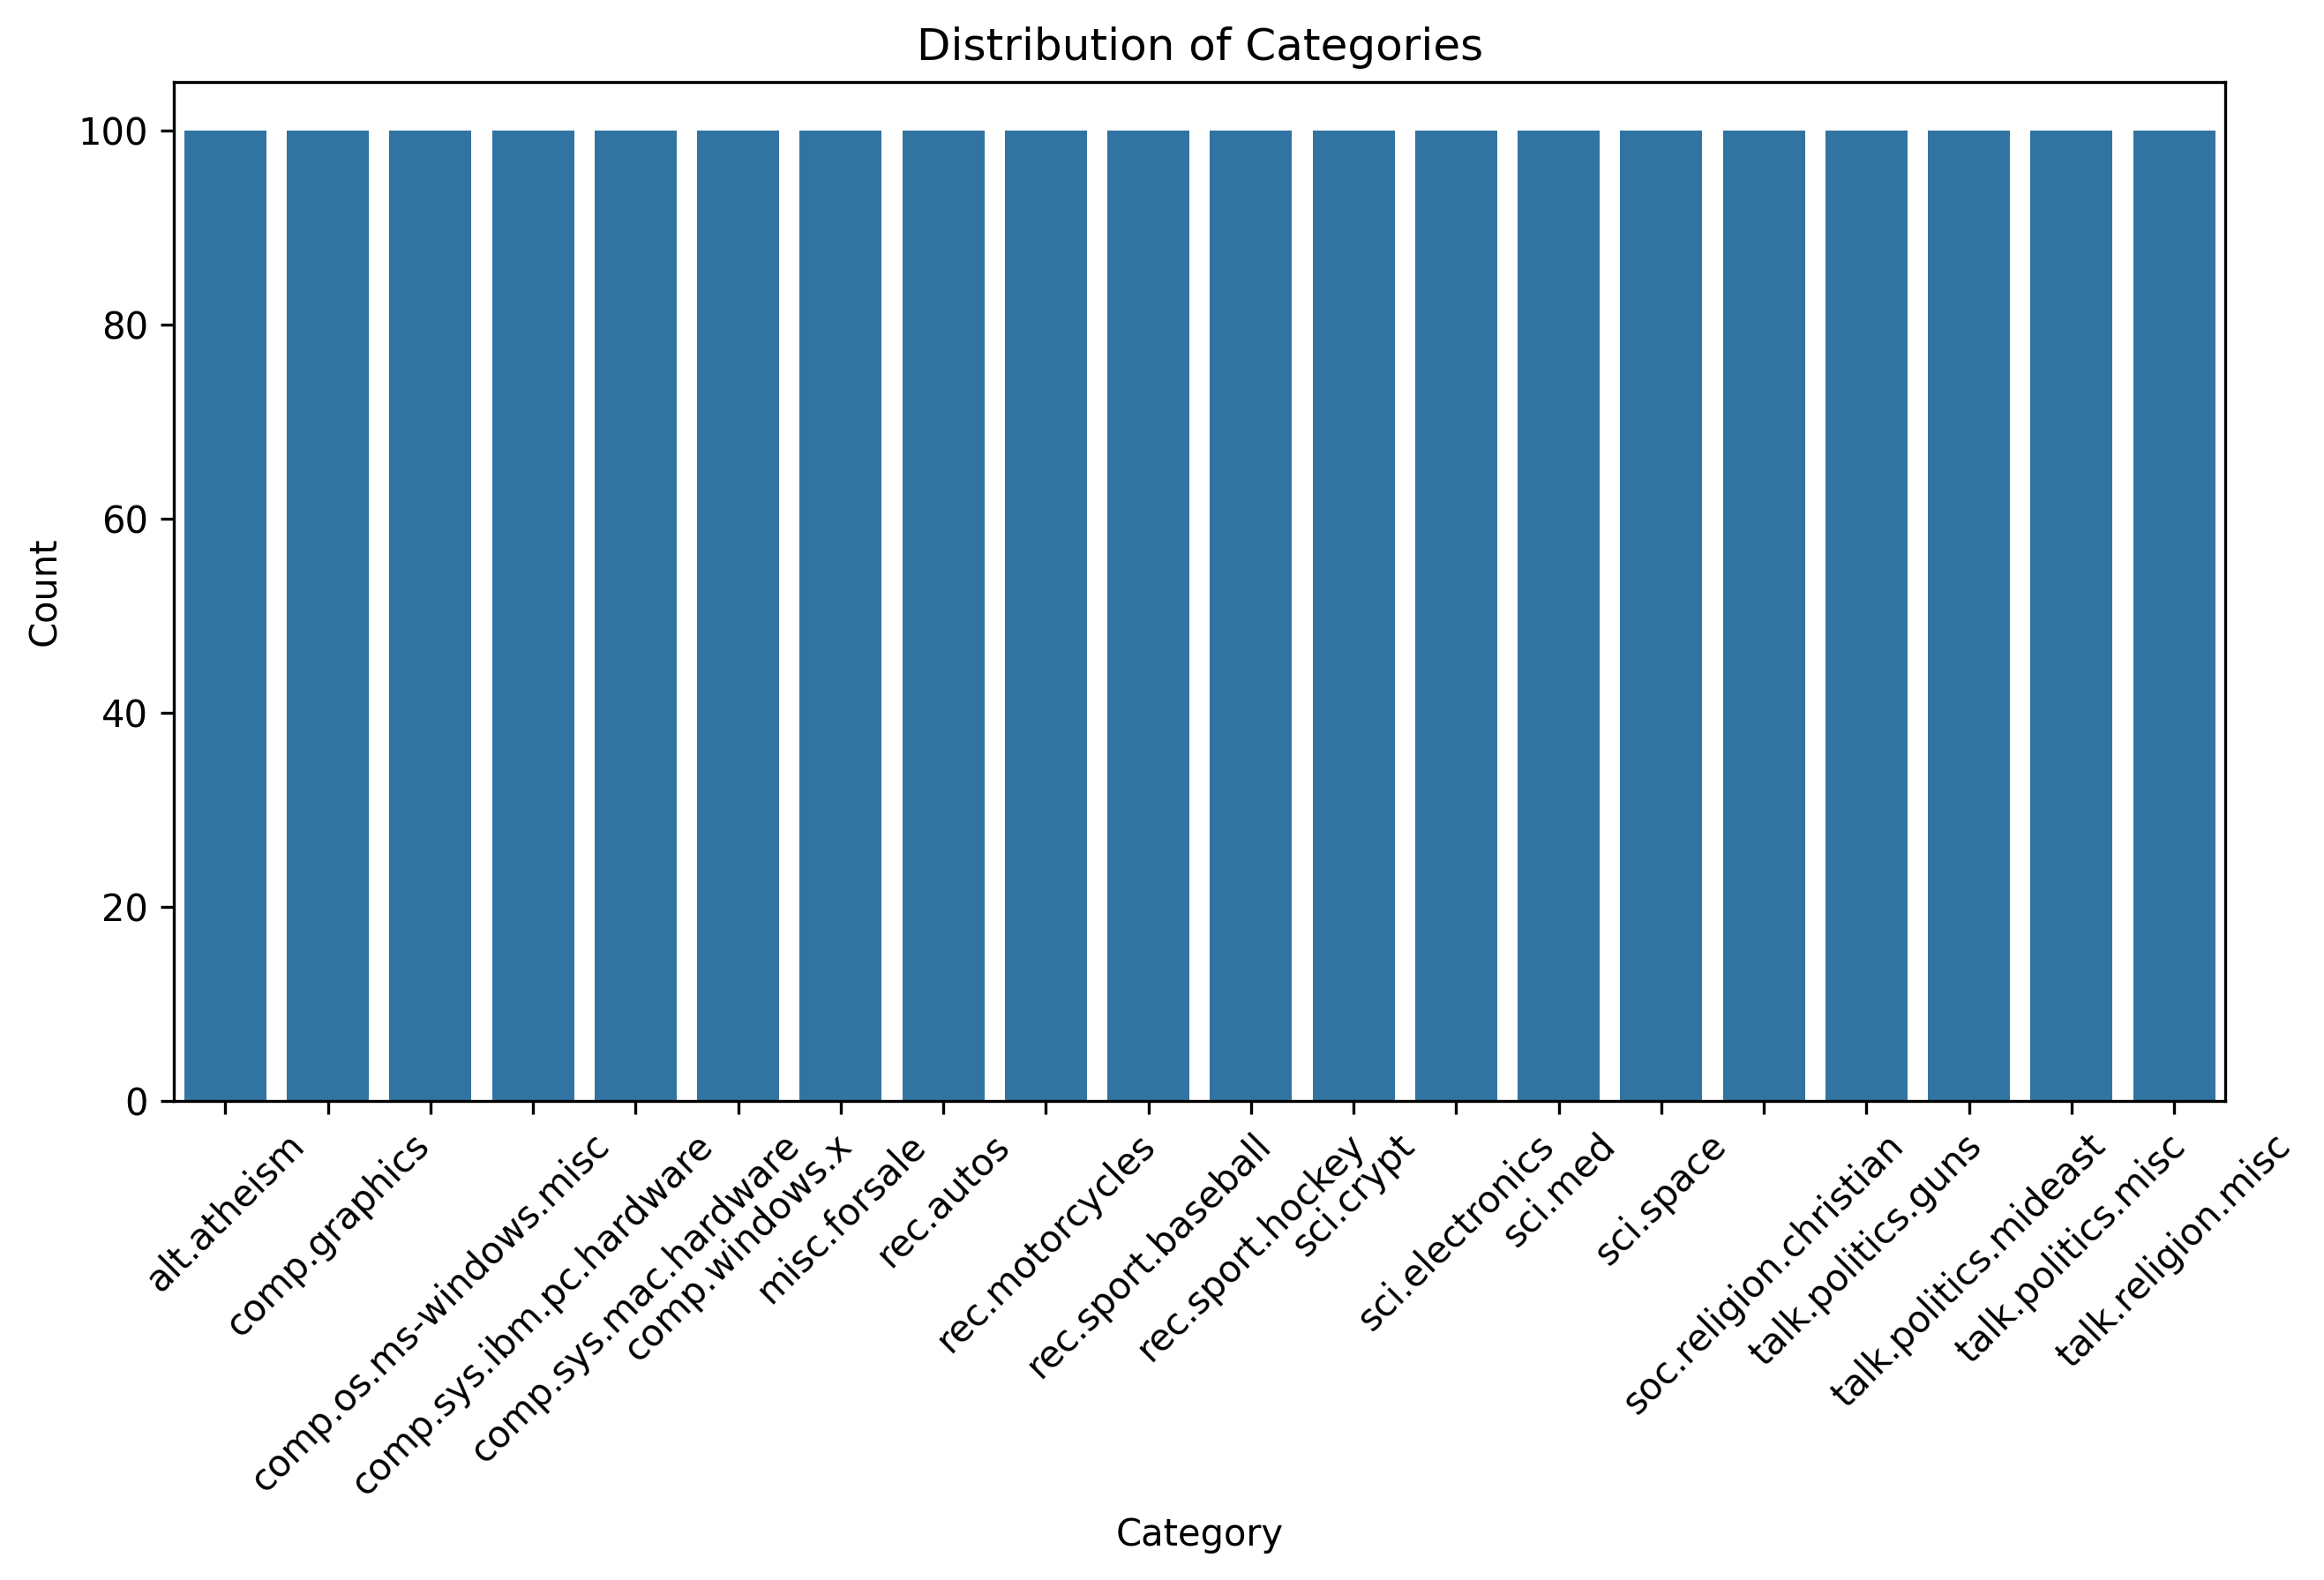

In [7]:
# EDA: Visualize Category Distribution
sns.countplot(x='Labels', data=df)
plt.title("Distribution of Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## **4. Text Preprocessing**

In [8]:
lemma = WordNetLemmatizer()
corpus = []
for i in range(len(df)):
    # Clean text: Remove non-alphabetic characters
    msg = re.sub('[^a-zA-Z]', ' ', df['Data'][i])
    msg = msg.lower()  # Convert to lowercase
    msg = msg.split()  # Tokenize text
    # Remove stopwords and apply lemmatization
    msg = [lemma.lemmatize(word) for word in msg if word not in stopwords.words('english')]
    msg = ' '.join(msg)  # Rejoin processed words
    corpus.append(msg)

## **5. TF-IDF Vectorization and Data Splitting**

In [9]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(corpus).toarray()
y = df['Labels']

# Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **6. Train and Evaluate Naive Bayes Model**

In [10]:
# Train Naive Bayes Model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [11]:
# Evaluate Model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.58      0.83      0.68        18
           comp.graphics       0.72      0.72      0.72        18
 comp.os.ms-windows.misc       0.76      1.00      0.86        22
comp.sys.ibm.pc.hardware       0.72      0.92      0.81        25
   comp.sys.mac.hardware       0.80      0.57      0.67        21
          comp.windows.x       0.91      0.40      0.56        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.81      0.94      0.87        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.85      0.94      0.89        18
        rec.sport.hockey       0.71      1.00      0.83        15
               sci.crypt       0.79      1.00      0.88        19
         sci.electronics       0.83      0.62      0.71        16
                 sci.med       0.88      0.88      0

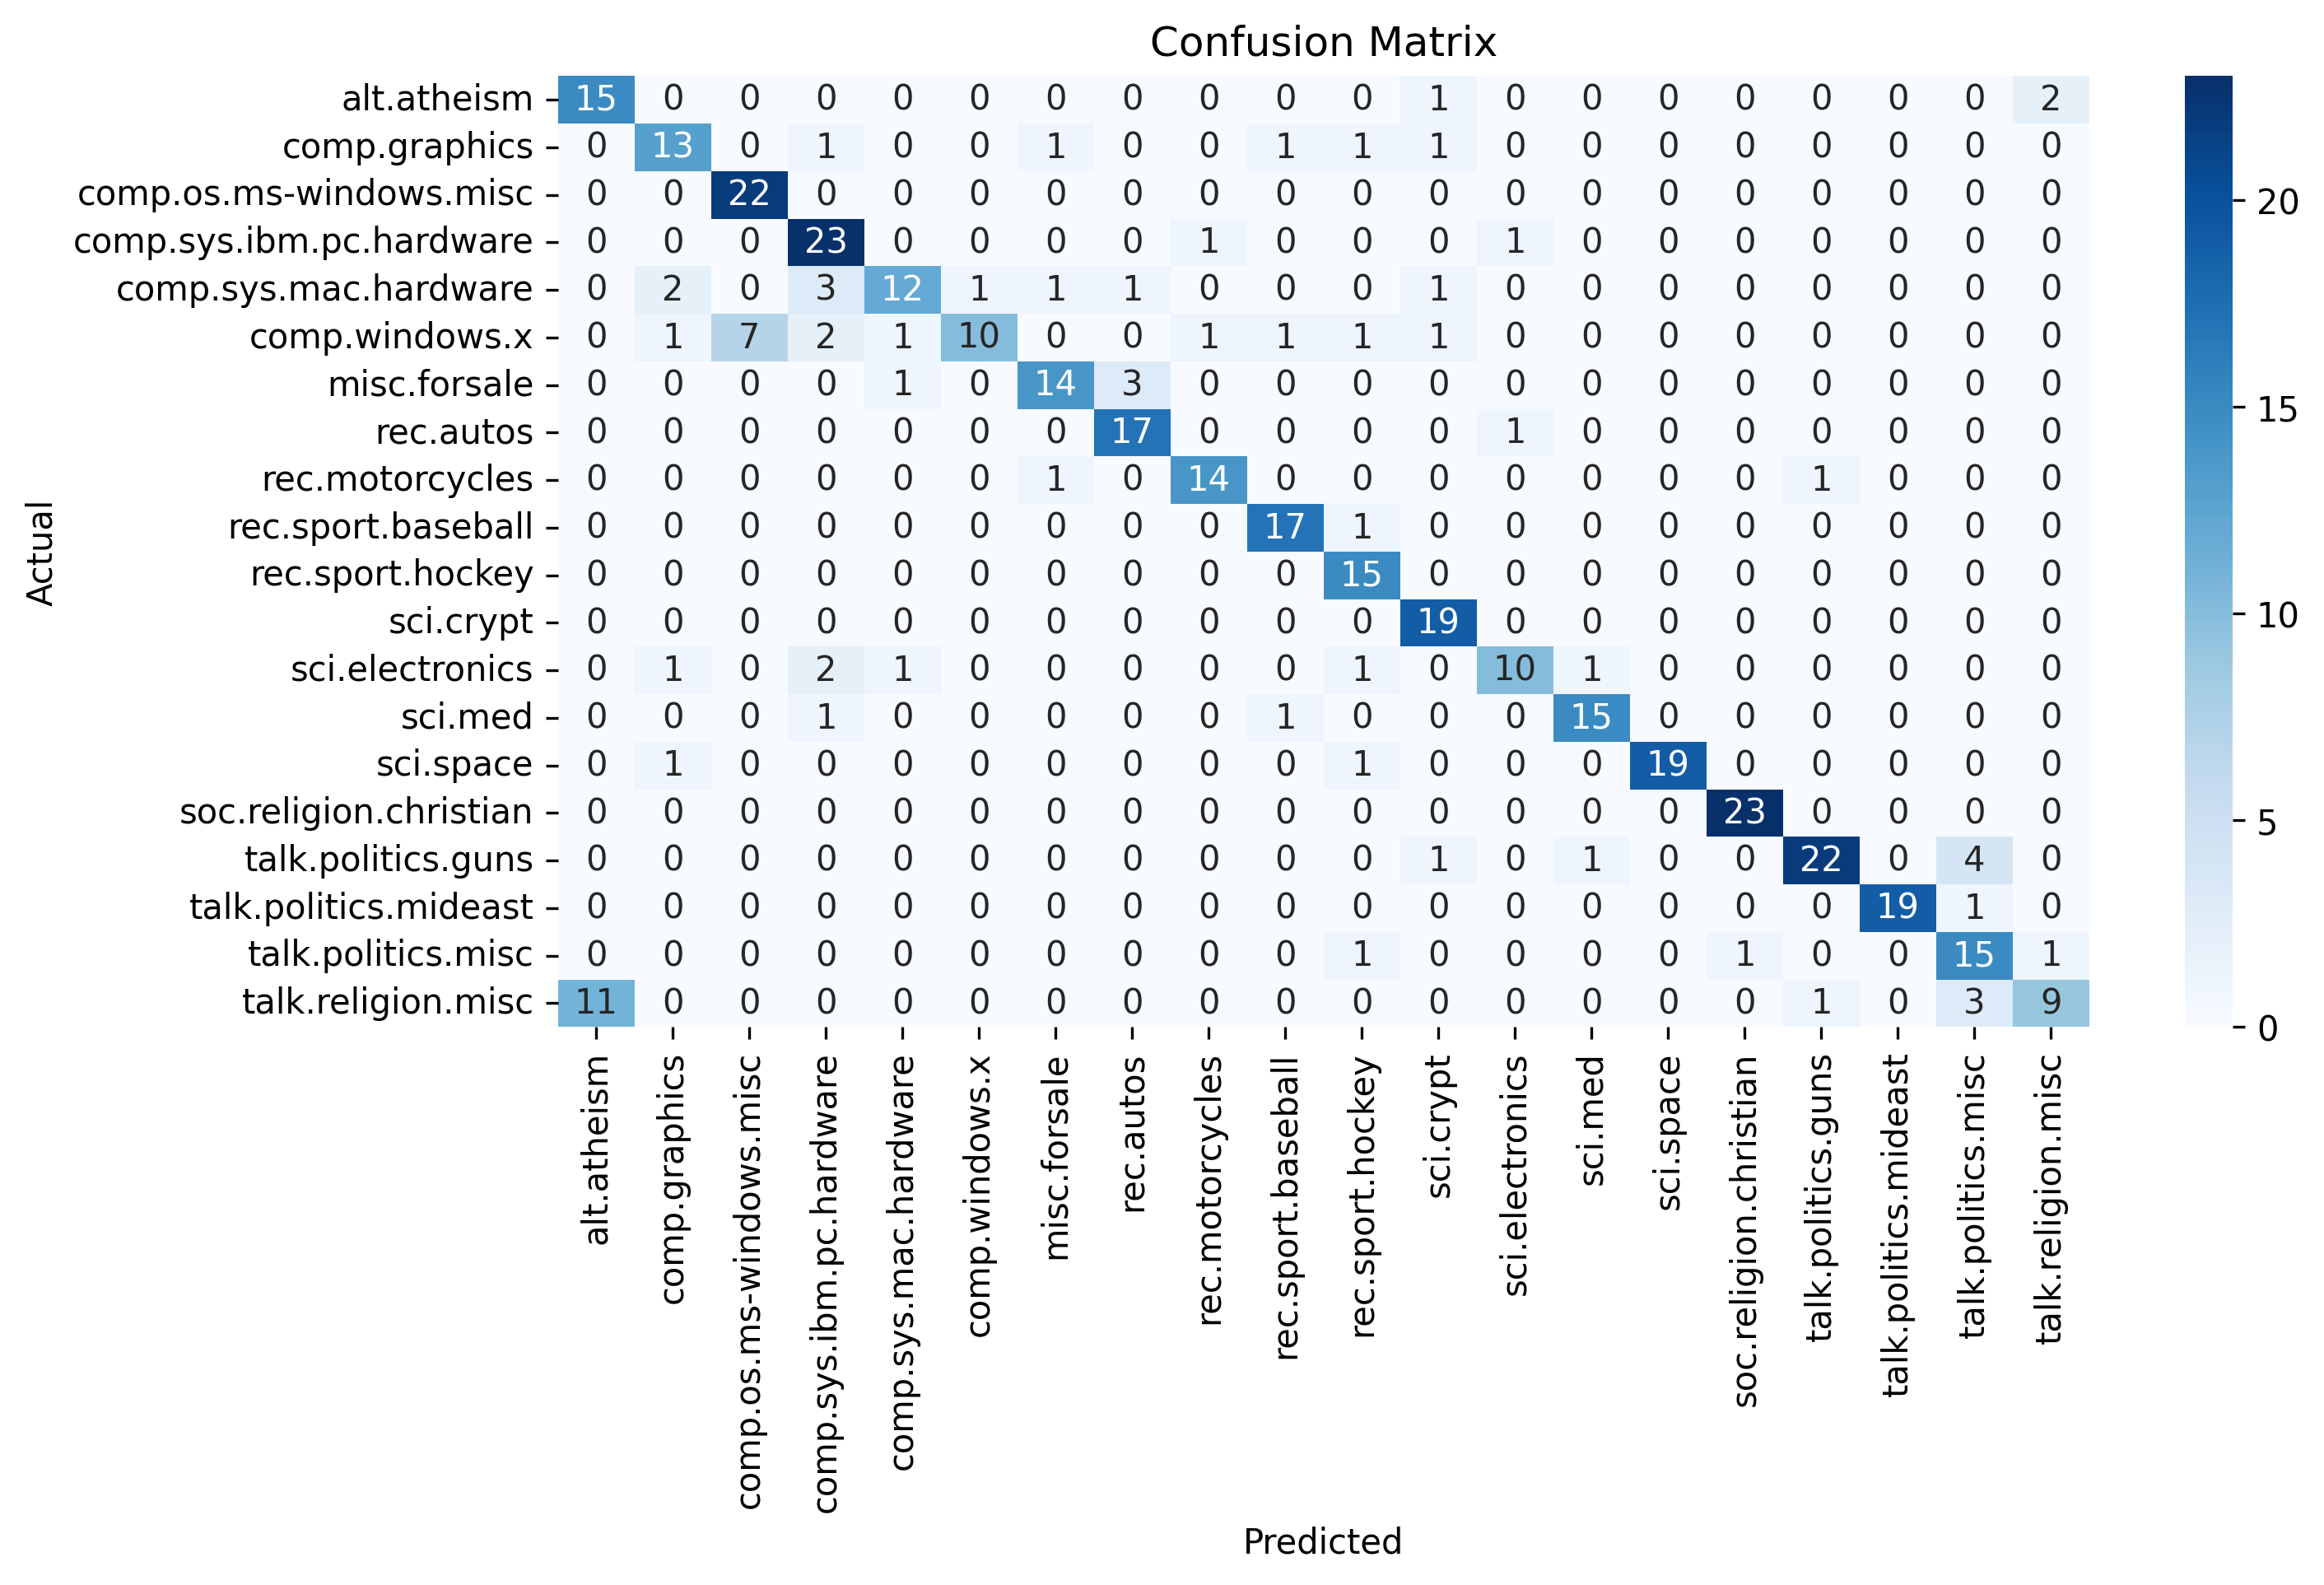

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **7. Perform Sentiment Analysis**

In [13]:
# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Data'].apply(get_sentiment)


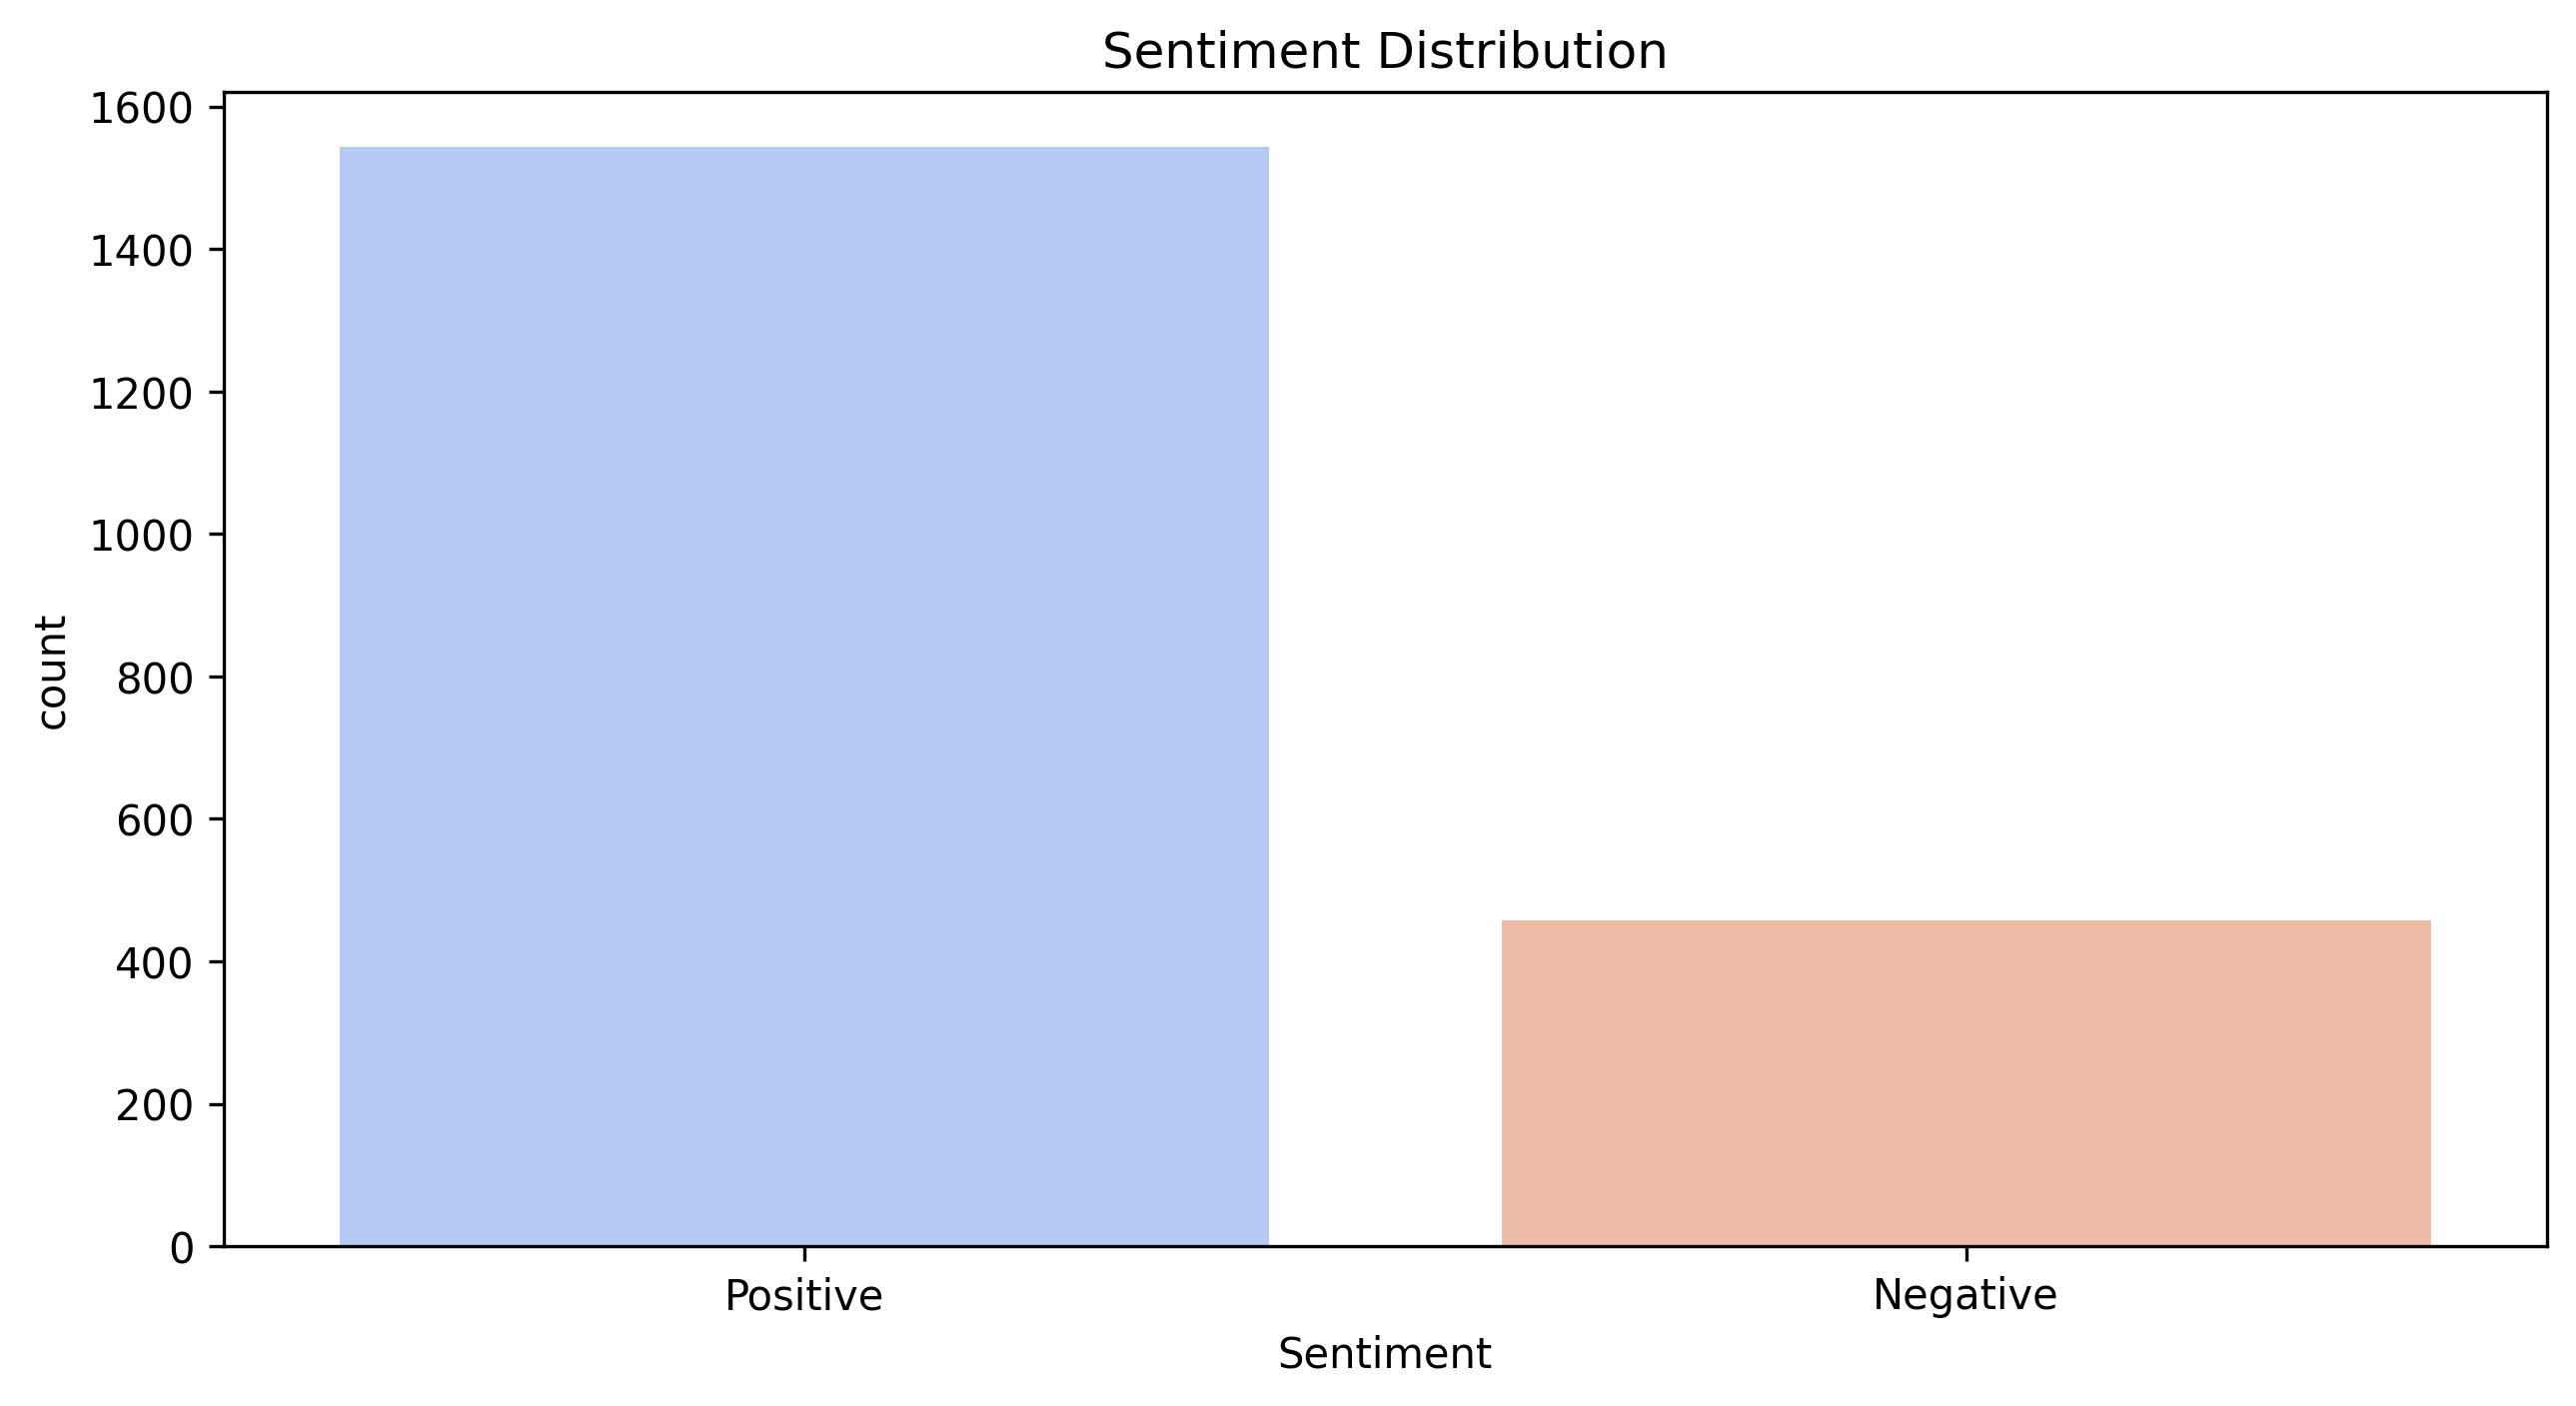

In [14]:
# Visualize Sentiment Distribution with colors
sns.countplot(x='Sentiment', data=df, palette='coolwarm')
plt.title("Sentiment Distribution")
plt.show()

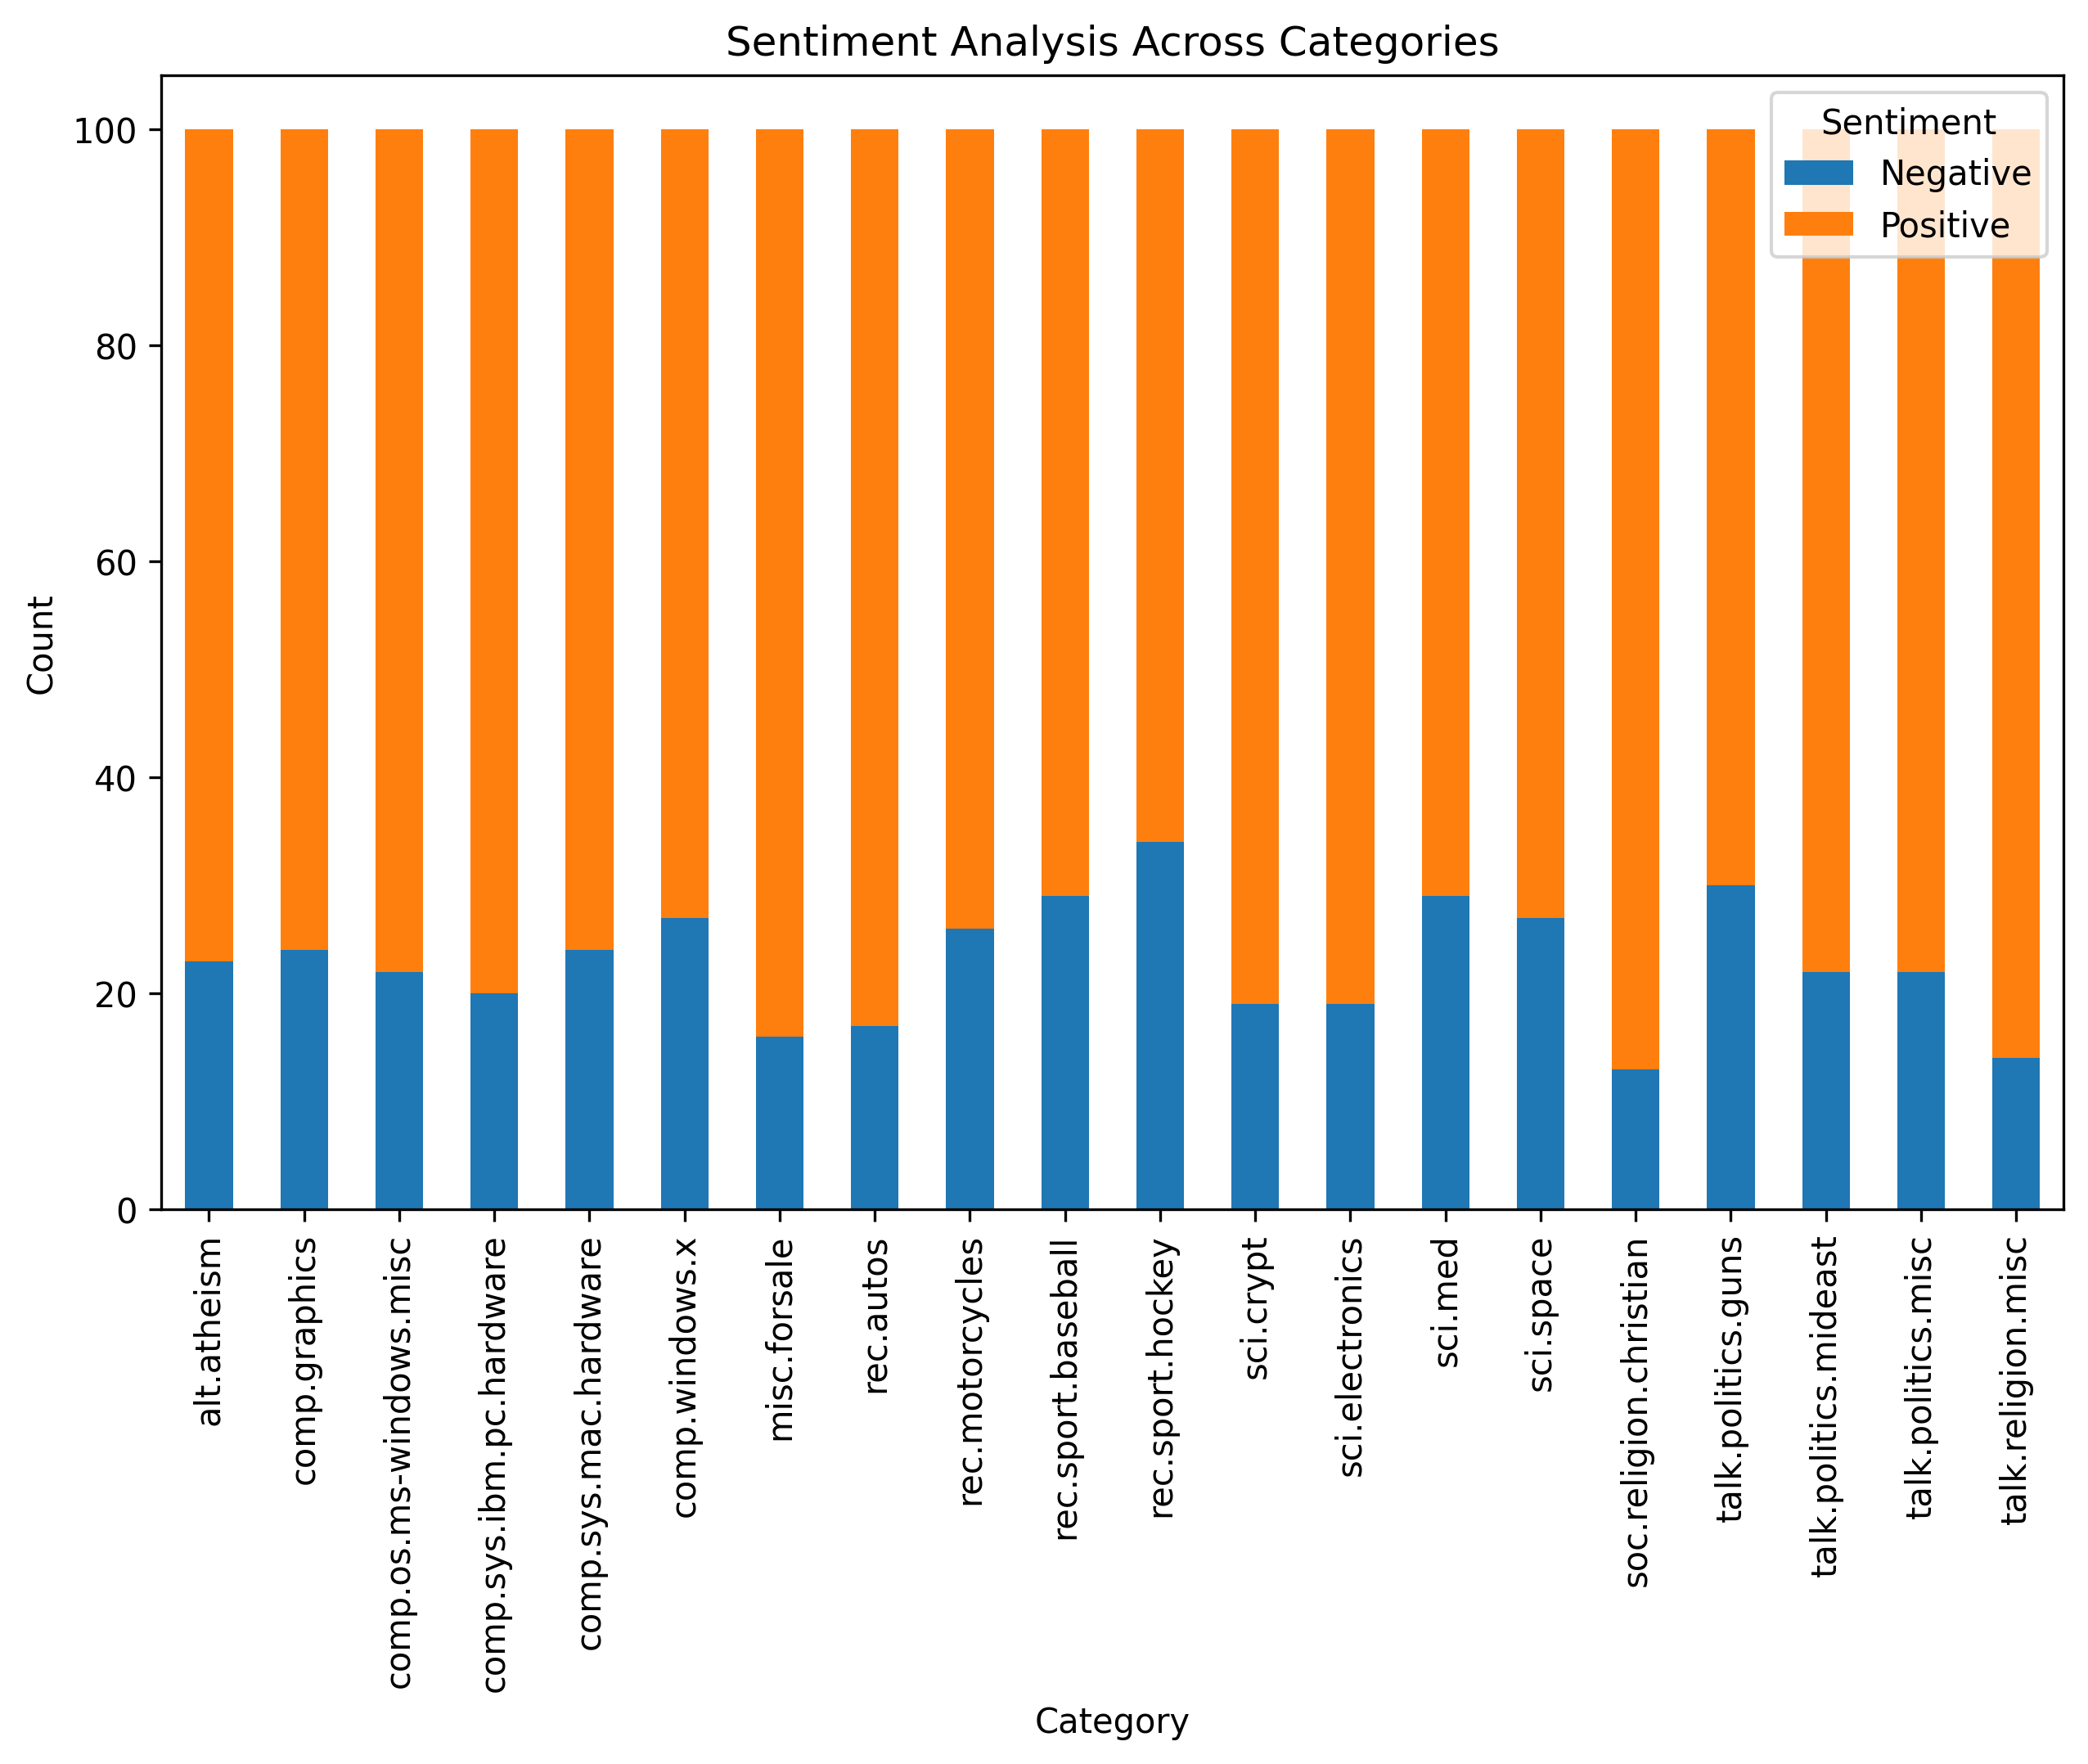

In [15]:
# Analyze Sentiments Across Categories
sentiment_by_category = df.groupby('Labels')['Sentiment'].value_counts().unstack()
sentiment_by_category.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Sentiment Analysis Across Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.show()

In [16]:
# WordCloud function
def worldcl(data, heading):
    txt = ' '.join(data)
    wc = WordCloud(background_color='white', width=700, height=200, colormap='viridis').generate(txt)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(heading, fontsize=16)
    plt.show()

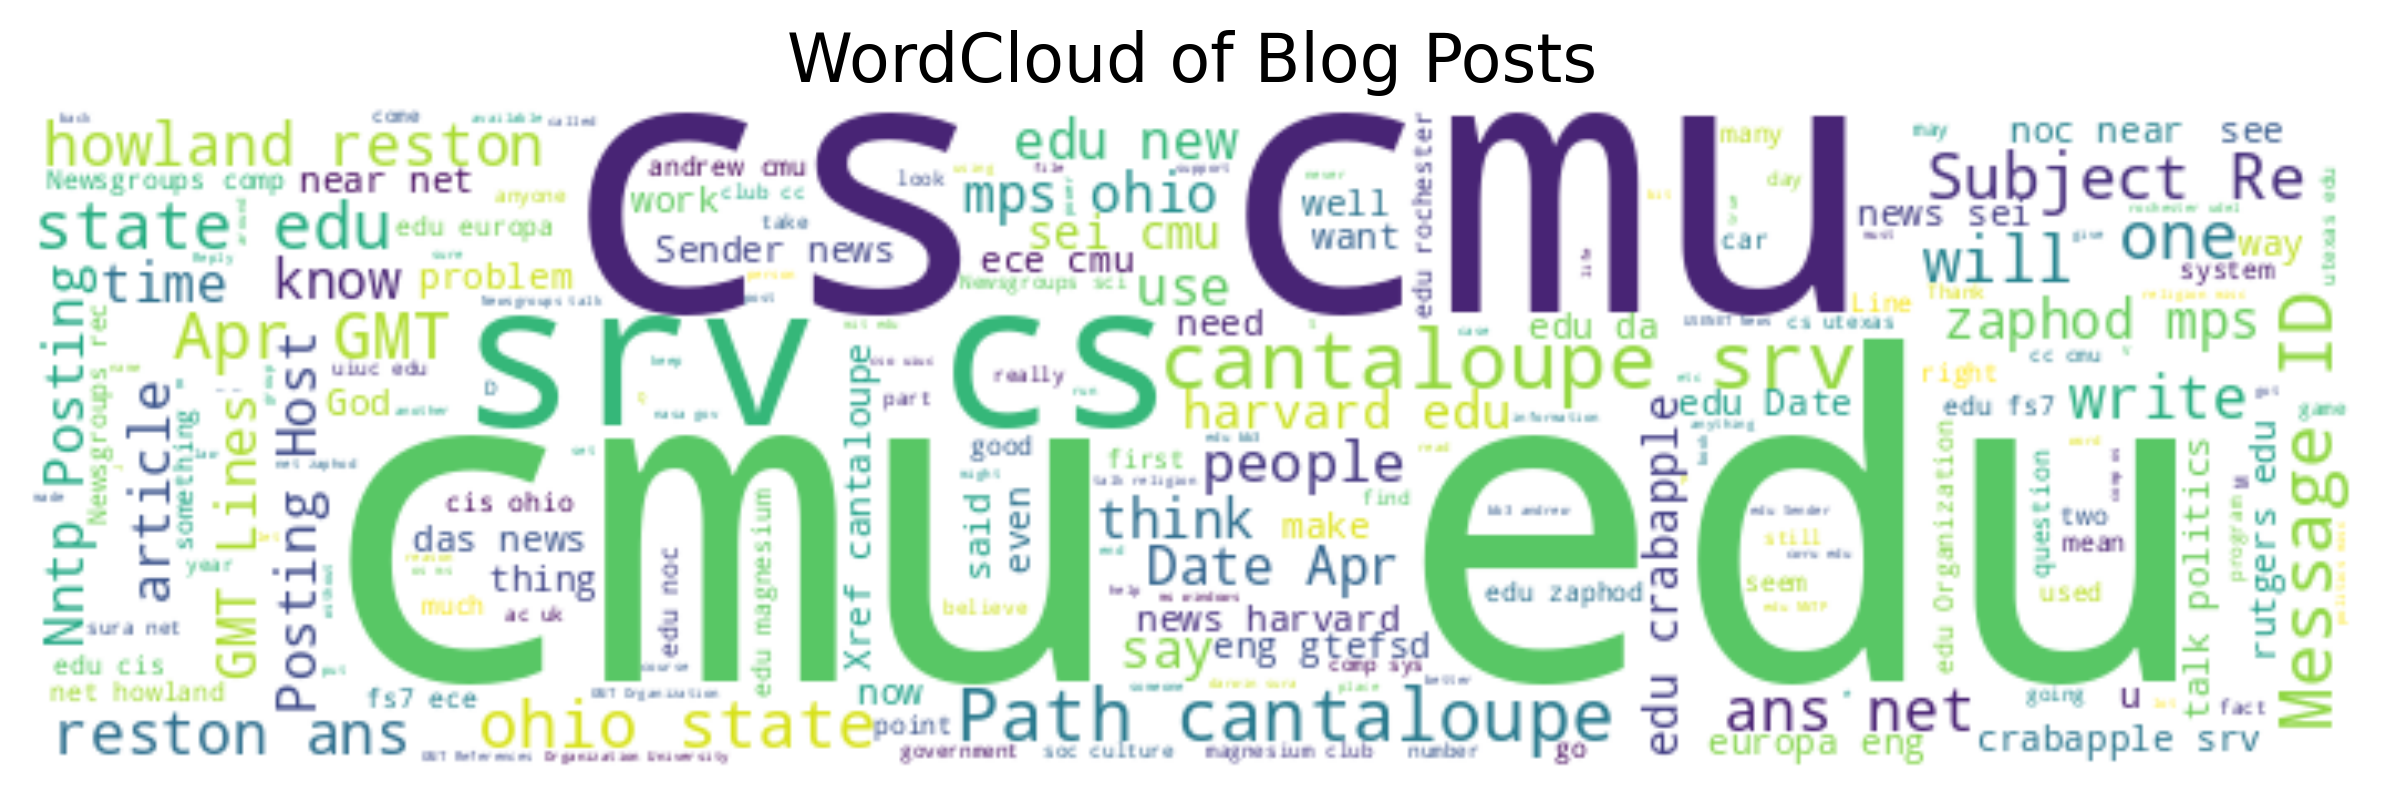

In [17]:
# Generate WordCloud for blog text
worldcl(df['Data'], "WordCloud of Blog Posts")

In [18]:
import spacy
from spacy import displacy

# Load SpaCy model
nlp = spacy.load("en_core_web_lg")  # Make sure this is added

# Named entity recognition with SpaCy
sample_text = ' '.join(df['Data'][:1])  # Example: First blog post
doc = nlp(sample_text)
displacy.render(doc, style='ent', jupyter=True)
